## Minimal example for using AutoScatter

This notebook serves as a proof of concept and explains how to use AutoScatter for the simple example of an isolator.

An isolator is a two-port device with perfect transmission from one port to the other and zero transmission in the reverse direction and has the scattering matrix:

$S_\mathrm{target}=\begin{pmatrix}0&0\\ 1&0\end{pmatrix}$

For further details, checkout our [GitHub](https://github.com/jlandgr/autoscatter) and [arxiv:2404.14887](https://arxiv.org/abs/2404.14887).

In [1]:
# In case you are using Google Colab, this cell will install you AutoScatter
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !pip install git+https://github.com/jlandgr/autoscatter.git

In [2]:
import sympy as sp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import autoscatter.architecture_optimizer as arch_opt
import autoscatter.constraints as msc
import autoscatter.symbolic as sym

In [3]:
S_target = sp.Matrix([[0,0],[1,0]])
print('target scattering matrix of an isolator:')
sym.render(S_target)
optimizer = arch_opt.Architecture_Optimizer(
    S_target=sp.Matrix([[0,0],[1,0]]),
    num_auxiliary_modes=1,
)
irreducible_graphs = optimizer.perform_depth_first_search()

target scattering matrix of an isolator:


<IPython.core.display.Math object>

fully connected graph is a valid graph
prepare list of all possible graphs


216it [00:00, 195673.79it/s]


216 graphs identified
start depth-first search
test all graphs with 9 degrees of freedom:


100%|██████████| 1/1 [00:00<00:00,  7.99it/s]


test all graphs with 8 degrees of freedom:


100%|██████████| 6/6 [00:00<00:00, 83.73it/s]


test all graphs with 7 degrees of freedom:


100%|██████████| 15/15 [00:00<00:00, 34.31it/s]


test all graphs with 6 degrees of freedom:


100%|██████████| 10/10 [00:00<00:00, 59.66it/s]


test all graphs with 5 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 4 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 3 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 2 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 1 degrees of freedom:


0it [00:00, ?it/s]


test all graphs with 0 degrees of freedom:


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 3 elements


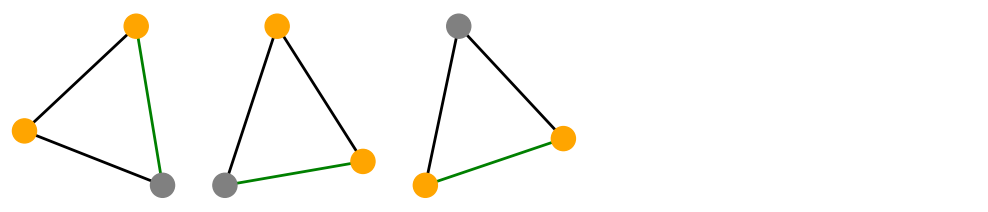

In [4]:
node_colors = ['orange', 'orange', 'gray'] # the port modes are orange, the auxiliary mode gray
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)